<a href="https://colab.research.google.com/github/fermanco/ComunicacionsMobils/blob/main/Wireless_communications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CREATION OF CELLS AND SECTORS

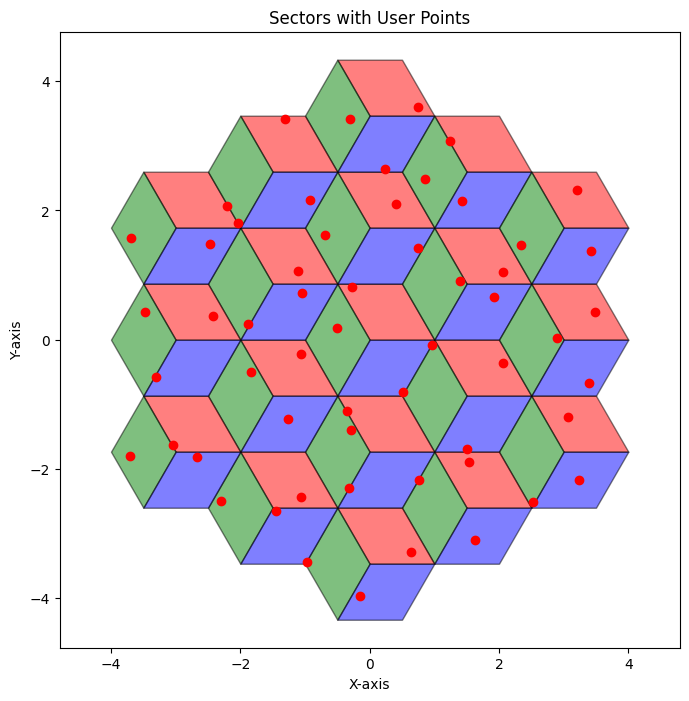

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import cumfreq
from matplotlib.patches import RegularPolygon
import math
import geopandas as gpd
from shapely.geometry import Polygon, LineString, Point
import random

# Simulation parameters
num_cells = 19
num_sectors = 3

iterations_ring1 = 6
iterations_ring2 = 2*iterations_ring1
pathloss_exponent = 3.8


def generate_hexagonal_cells():
    cell_coordinates = []
    center_cell = [0, 0] # central cell coordinates
    cell_coordinates.append(center_cell)
    for i in range(iterations_ring1): # iterations of the first ring among the central cell
        angle = 2 * np.pi / iterations_ring1 * i
        x = (center_cell[0] + np.sqrt(3)) * np.sin(angle)
        y = (center_cell[1] + np.sqrt(3)) * np.cos(angle)
        cell_coordinates.append((x, y))

    for i in range(iterations_ring2): # iterations of the second ring of cells
      angle = 2 * np.pi / iterations_ring2 * i
      if (i % 2) == 0: # needed to specify distances between center and exterior cells
        x = (center_cell[0] + 2*np.sqrt(3)) * np.sin(angle)
        y = (center_cell[1] + 2*np.sqrt(3)) * np.cos(angle)
      else:
        x = (center_cell[0] + 3) * np.sin(angle)
        y = (center_cell[1] + 3) * np.cos(angle)
      cell_coordinates.append((x, y))
    return cell_coordinates


def generate_user_location(polygon):
    min_x, min_y, max_x, max_y = polygon.bounds  # Get the bounds of the polygon
    while True:
        # Generate a random point within the bounding box of the polygon
        random_point = Point(random.uniform(min_x, max_x), random.uniform(min_y, max_y))
        # Check if the random point is inside the polygon
        if polygon.contains(random_point) and not random_point.touches(polygon.boundary):
            return random_point


def calculate_distances(point1, point2):
  point1 = Point(point1)
  point2 = Point(point2)
  x1  = point1.x
  x2  = point2.x
  y1  = point1.y
  y2  = point2.y

  return np.sqrt((x2 - x1)**2 +(y2 - y1)**2)


cells_center = generate_hexagonal_cells()

#################################################################
# Cell and Sector Generation

polygon_coords = [[0 for _ in range(6)] for _ in range(19)]

for i in range(len(cells_center)):
  for j in range(6):
    x = cells_center[i][0] + np.cos(2*np.pi*j/6)
    y = cells_center[i][1] + np.sin(2*np.pi*j/6)
    polygon_coords[i][j] = [x,y]

sectors = []
users = []

for i in range(len(polygon_coords)):

  sector1 = Polygon([cells_center[i], polygon_coords[i][0], polygon_coords[i][1], polygon_coords[i][2]])
  sector2 = Polygon([cells_center[i], polygon_coords[i][2], polygon_coords[i][3], polygon_coords[i][4]])
  sector3 = Polygon([cells_center[i], polygon_coords[i][4], polygon_coords[i][5], polygon_coords[i][0]])

  sectors.append(sector1)
  sectors.append(sector2)
  sectors.append(sector3)

  user1 = generate_user_location(sector1)
  user2 = generate_user_location(sector2)
  user3 = generate_user_location(sector3)

  users.append(user1)
  users.append(user2)
  users.append(user3)

sectors_gdf = gpd.GeoDataFrame(geometry=sectors)
users_gdf = gpd.GeoDataFrame(geometry=users)

# Plotting the sectors and points
fig, ax = plt.subplots(figsize=(8, 8))

# Plot sectors

colors = ['red', 'green', 'blue']

for idx, sector in enumerate(sectors_gdf['geometry']):
    #if idx % len(colors) == 0:
    gpd.GeoSeries([sector]).plot(ax=ax, edgecolor='black', alpha=0.5, facecolor=colors[idx % len(colors)])

#sectors_gdf.plot(ax=ax, edgecolor='black', alpha=0.5)

# Plot user points
for point in users:
    plt.plot(point.x, point.y, 'ro')  # Plot user points in red

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Sectors with User Points')
ax.axis('equal')
plt.show()


# REUSE FACTOR 1

In [ ]:
sir_values_db_1 = []
sir_values_db_2 = []
sir_values_db_3 = []
snapshots = 1000

mean = 0
std_deviation = 8

In [ ]:
############################################# QUESTION 1 ############################################# REUSE FACTOR 1

# Reuse factor = 1

# With the pathloss exponent we can get the predicted received average power at a given distance
for i in range(snapshots):

  # numerador

  d = (np.sqrt(users[0].x**2 + users[0].y**2))**pathloss_exponent # distance of the reference user to its corresponding base station
  X = np.random.lognormal(mean, std_deviation) # random noise

  # denominador

  d_k = 0
  x_k = 0
  for j in range(1,len(users)):
    d_k += (calculate_distances(users[j],cells_center[0]))**pathloss_exponent
    x_k += np.random.lognormal(mean, std_deviation)

  SIR = (X/d)/(x_k/d_k)
  sir_db = 10*np.log10(SIR)
  sir_values_db_1.append(sir_db)

# REUSE FACTOR 3

In [ ]:
ids = [3,6,21,24,27,30,54] # sectors

############################################# QUESTION 1 ############################################# REUSE FACTOR 3

# Reuse factor = 3


for i in range(snapshots):

  d = (np.sqrt(users[0].x**2 + users[0].y**2))**pathloss_exponent # distance of the reference user to its corresponding base station


  X =  np.random.lognormal(mean, std_deviation) # random noise
  d_k = 0
  x_k = 0


  for j in ids:
    d_k += (calculate_distances(users[j],cells_center[0]))**pathloss_exponent
    x_k +=  np.random.lognormal(mean, std_deviation)


  SIR = (X/d)/(x_k/d_k)
  sir_db = 10*np.log10(SIR)
  sir_values_db_2.append(sir_db)

# REUSE FACTOR 9

In [ ]:
cluster_A = [0,1,2,24,25,26,30,31,32,36,37,38,42,43,44,48,49,50,54,55,56]
cluster_B = [3,4,5,9,10,11,15,16,17,27,28,29,39,40,41,51,52,53]

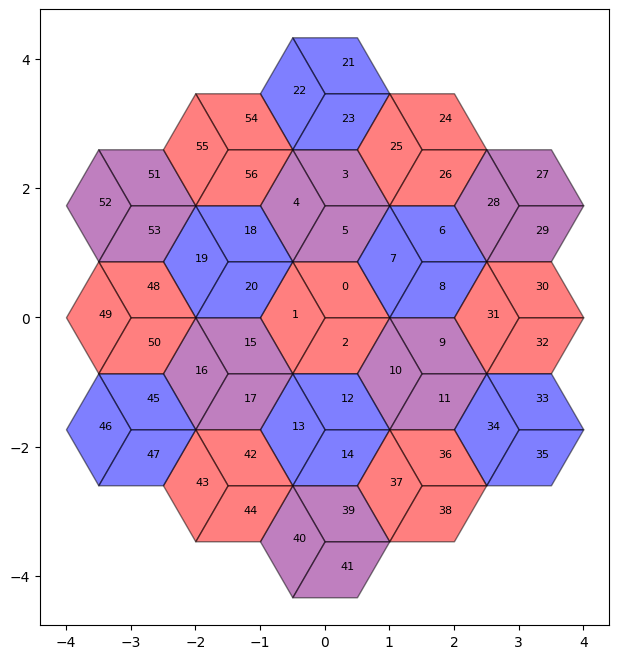

In [ ]:
# Plotting the sectors and points
fig, ax = plt.subplots(figsize=(8, 8))

colors = ['red', 'green', 'blue']

for idx, sector in enumerate(sectors_gdf['geometry']):
    if idx in cluster_A:
        gpd.GeoSeries([sector]).plot(ax=ax, edgecolor='black', alpha=0.5, facecolor='red')
    elif idx in cluster_B:
        gpd.GeoSeries([sector]).plot(ax=ax, edgecolor='black', alpha=0.5, facecolor='purple')
    else:
        gpd.GeoSeries([sector]).plot(ax=ax, edgecolor='black', alpha=0.5, facecolor='blue')

    # Annotate with the index number
    centroid = sector.centroid
    ax.annotate(str(idx), (centroid.x, centroid.y), color='black', fontsize=8)

plt.show()


In [ ]:
ids = [24,30,54] # sectors

############################################# QUESTION 1 ############################################# REUSE FACTOR 9

# Reuse factor = 9

for i in range(snapshots):

  d = (np.sqrt(users[0].x**2 + users[0].y**2))**pathloss_exponent # distance of the reference user to its corresponding base station
  X = np.random.lognormal(mean, std_deviation) # random noise
  d_k = 0
  x_k = 0


  for j in ids:
    d_k += (calculate_distances(users[j],cells_center[0]))**pathloss_exponent
    x_k += np.random.lognormal(mean, std_deviation)


  SIR = (X/d)/(x_k/d_k)
  sir_db = 10*np.log10(SIR)
  sir_values_db_3.append(sir_db)

# PLOTS

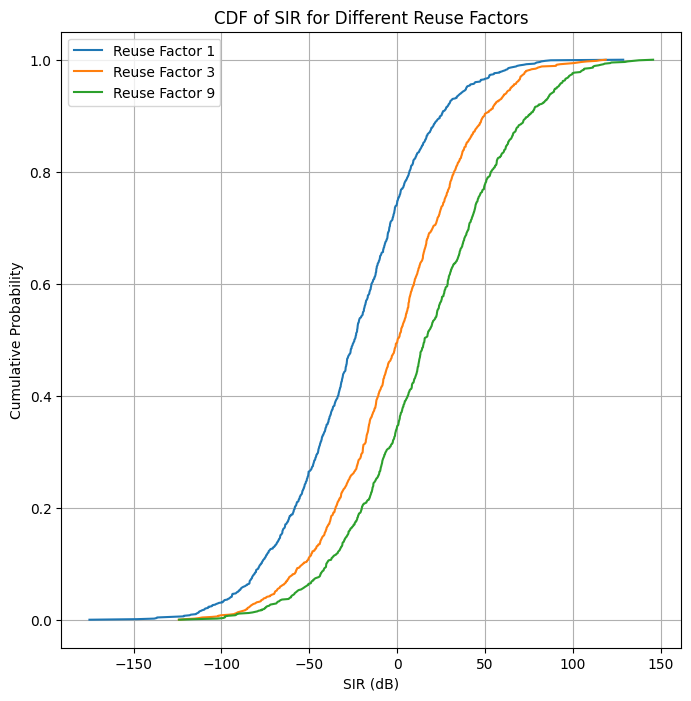

In [ ]:
### PLOTS
import scipy.stats as ss

fig, ax = plt.subplots(figsize=(8, 8))


sorted_sir1 = np.sort(sir_values_db_1)

cdf1 = np.arange(1, len(sorted_sir1) + 1) / len(sorted_sir1)
plt.plot(sorted_sir1, cdf1, label=f'Reuse Factor 1')



sorted_sir2 = np.sort(sir_values_db_2)

cdf2 = np.arange(1, len(sorted_sir2) + 1) / len(sorted_sir2)
plt.plot(sorted_sir2, cdf2, label=f'Reuse Factor 3')



sorted_sir3 = np.sort(sir_values_db_3)

cdf3 = np.arange(1, len(sorted_sir3) + 1) / len(sorted_sir3)
plt.plot(sorted_sir3, cdf3, label=f'Reuse Factor 9')


# cdf_values2, bin_edges2 = np.histogram(sir_values_db_2, bins=100, density=True)
# pdf2 = cdf_values2 / sum(cdf_values2)
# cdf2 = np.cumsum(pdf2)
# plt.plot(bin_edges2[1:], cdf2, label=f'Reuse Factor 3')


# cdf_values3, bin_edges3 = np.histogram(sir_values_db_3, bins=100, density=True)
# pdf3 = cdf_values3 / sum(cdf_values3)
# cdf3 = np.cumsum(pdf3)
# plt.plot(bin_edges2[1:], cdf3, label=f'Reuse Factor 9')


plt.xlabel('SIR (dB)')
plt.ylabel('Cumulative Probability')
plt.title('CDF of SIR for Different Reuse Factors')
plt.legend()
plt.grid(True)

#plt.xlim(-40, 70)
plt.show()

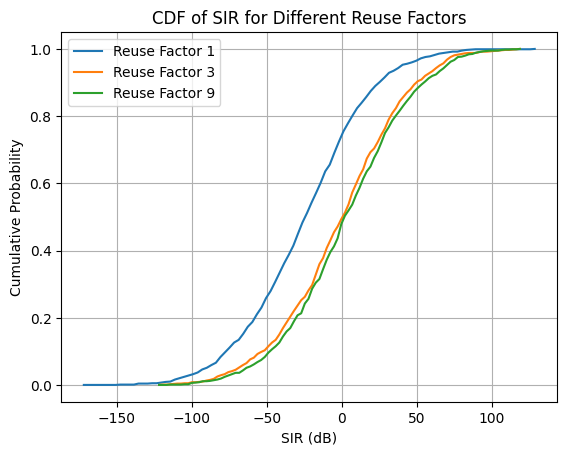

In [ ]:
cdf_values1, bin_edges1 = np.histogram(sir_values_db_1, bins=100, density=True)
pdf1 = cdf_values1 / sum(cdf_values1)
cdf1 = np.cumsum(pdf1)
plt.plot(bin_edges1[1:], cdf1, label=f'Reuse Factor 1')


cdf_values2, bin_edges2 = np.histogram(sir_values_db_2, bins=100, density=True)
pdf2 = cdf_values2 / sum(cdf_values2)
cdf2 = np.cumsum(pdf2)
plt.plot(bin_edges2[1:], cdf2, label=f'Reuse Factor 3')


cdf_values3, bin_edges3 = np.histogram(sir_values_db_3, bins=100, density=True)
pdf3 = cdf_values3 / sum(cdf_values3)
cdf3 = np.cumsum(pdf3)
plt.plot(bin_edges2[1:], cdf3, label=f'Reuse Factor 9')


plt.xlabel('SIR (dB)')
plt.ylabel('Cumulative Probability')
plt.title('CDF of SIR for Different Reuse Factors')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
cdf3

array([0.001, 0.001, 0.001, 0.004, 0.005, 0.006, 0.011, 0.014, 0.016,
       0.021, 0.027, 0.031, 0.037, 0.048, 0.058, 0.068, 0.074, 0.085,
       0.093, 0.104, 0.116, 0.136, 0.161, 0.174, 0.188, 0.205, 0.225,
       0.246, 0.265, 0.291, 0.313, 0.339, 0.354, 0.374, 0.393, 0.426,
       0.449, 0.474, 0.499, 0.514, 0.541, 0.563, 0.593, 0.62 , 0.643,
       0.658, 0.673, 0.696, 0.721, 0.747, 0.766, 0.788, 0.817, 0.829,
       0.85 , 0.863, 0.876, 0.892, 0.904, 0.92 , 0.926, 0.933, 0.94 ,
       0.947, 0.949, 0.953, 0.958, 0.966, 0.971, 0.976, 0.978, 0.981,
       0.984, 0.987, 0.988, 0.988, 0.99 , 0.993, 0.993, 0.994, 0.996,
       0.996, 0.997, 0.997, 0.998, 0.998, 0.998, 0.998, 0.998, 0.998,
       0.998, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999,
       1.   ])

# Active Power Control

In [ ]:
# La freq quina posem
# Gain ?
# Hem de provar diferents power control exponent?
# d és la distància del nostre user a la cel·la central i d_ref és la distància dels users externs a la cel·la central?

freq = 800*10**6
gain_t = 1 # isotropic antenna
gain_r = 1 # isotropic antenna
pc_exp = 3.8

def alpha(gain_t,gain_r,freq,d,d_ref):
  wavelength = (3*10**8)/freq
  L_p = ((gain_t*gain_r*wavelength)/(((4*np.pi)**2)*d_ref**2)*(d_ref)**pathloss_exponent)
  return L_p

def p(d, d_ref, pc_exp):
  p = alpha(gain_t,gain_r,freq,d,d_ref)*d**pc_exp

In [ ]:
ids = [3,6,21,24,27,30,54] # sectors

############################################# QUESTION 2 ############################################# REUSE FACTOR 3

# Reuse factor = 3

sir_values_db_4 = []

# Generate log-normal shadow fading values
mean = 0
std_deviation = 8  # Standard deviation of the underlying normal distribution (log of the shadow fading)
num_samples = 8  # Number of samples (adjust as needed)

# With the pathloss exponent we can get the predicted received average power at a given distance

snapshots = 10000

for i in range(snapshots):

  d = (np.sqrt(users[0].x**2 + users[0].y**2))**pathloss_exponent # distance of the reference user to its corresponding base station
  X = shadow_fading(mean, std_deviation, num_samples) # random noise
  # p = p(d, d_ref, pc_exp)
  sum_noises = 0
  d_k = 0

  for j in ids:
    d_k += (calculate_distances(users[j],cells_center[0]))**pathloss_exponent

  for k in range(1,len(X)):
    sum_noises += X[k]


  SIR = (X[0]/d)/(sum_noises/d_k)
  sir_values_db_4.append(10*math.log(SIR,10))

TypeError: ignored

In [ ]:
### PLOTS
fig, ax = plt.subplots(figsize=(8, 8))

cdf_values4, bin_edges4 = np.histogram(sir_values_db_4, bins=100, density=True)
pdf4 = cdf_values4 / sum(cdf_values4)
cdf4 = np.cumsum(pdf4)
plt.plot(bin_edges2[1:], cdf4, label=f'Reuse Factor 3 Active FPC')

plt.xlabel('SIR (dB)')
plt.ylabel('Cumulative Probability')
plt.title('CDF of SIR for Different Reuse Factors')
plt.legend()
plt.grid(True)

plt.xlim(-50, 100)
plt.show()